# 6.6 Task

### This script contains the following:

####  Importing libraries and data
####  Subsetting
####  Line Chart
####  Decompose the data
####  Dickey fuller
####  Autocorrelations

### Importing libraries and data

In [95]:
pip install Nasdaq-Data-Link

Note: you may need to restart the kernel to use updated packages.


In [13]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [15]:
# Configure API key 

quandl.ApiConfig.api_key = '7dSLLT9_8R4Acx_dRusU'

In [51]:
# Import the CPI data 
cpi_data = pd.read_csv('C:/Users/sosia/OneDrive/Desktop/CF/Data immersion/6/6.6/CPIAUCSL - Consumer Price Index for All Urban Consumers All Items in U.S. City Average.csv',index_col = False) 

In [38]:
# Import dataframe 
df = pd.read_csv(r'C:\Users\sosia\OneDrive\Desktop\CF\Data immersion\6\6.1\df_clean.csv', index_col = False)

In [40]:
df.shape

(1337, 8)

In [42]:
time.shape

(913, 2)

In [44]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
time

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990


#### CPI is a general measure of inflation that can impact healthcare expenses, even if it doesn't directly measure them.
#### Since my dataset is about insurance charges, there is a relationship between inflation and insurance pricing strategies.

# Subsetting

In [63]:
# Convert to datetime objects
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])

In [73]:
# Subsetting 
cpi_subset = cpi_data['1/1/2020':'1/1/2023'] 

In [75]:
# Reset index
cpi_subset = cpi_subset.reset_index()
cpi_subset['Date'] = pd.to_datetime(cpi_subset['Date'])
cpi_subset = cpi_subset.set_index('Date')

In [114]:
# Display the subset
cpi_subset.head()

,DATE,CPIAUCSL
Date,,
2020-01-01,2020-01-01,259.037
2020-02-01,2020-02-01,259.248
2020-03-01,2020-03-01,258.124
2020-04-01,2020-04-01,256.092
2020-05-01,2020-05-01,255.868


### I have subsetted the CPI data to include data from January 1, 2000, to January 1, 2023. This range was chosen because it aligns with the time period of my main research data

# Line Chart

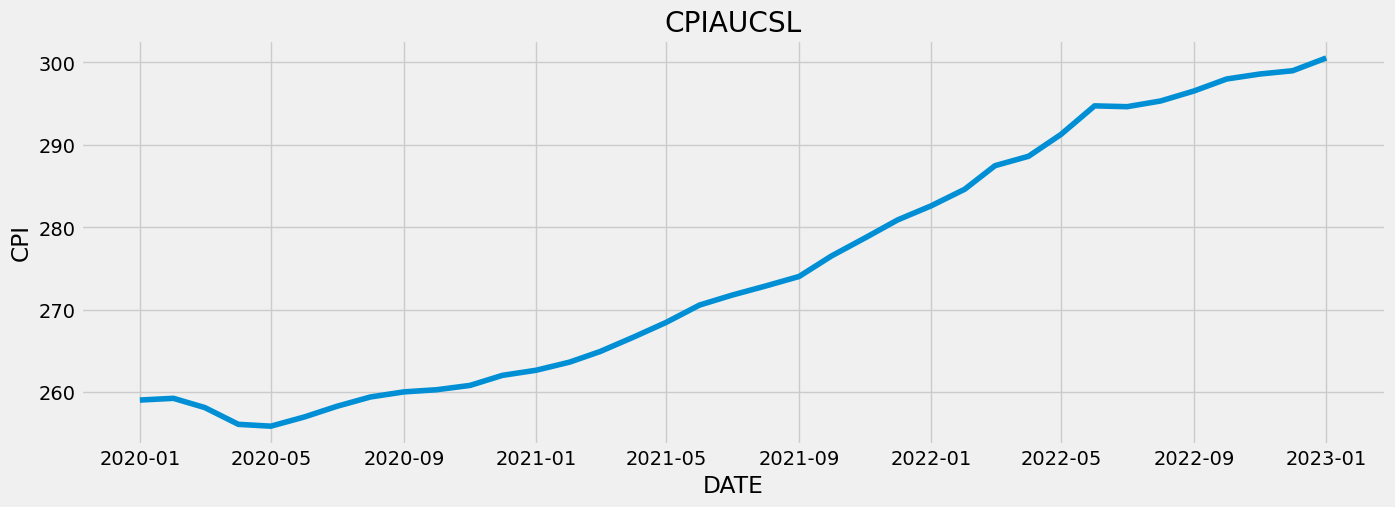

In [89]:
# Line Chart
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(cpi_subset['CPIAUCSL'])  # Assuming 'CPI' is the column name
plt.title('CPIAUCSL')
plt.xlabel('DATE')
plt.ylabel('CPI')
plt.show()

# Decompose the data

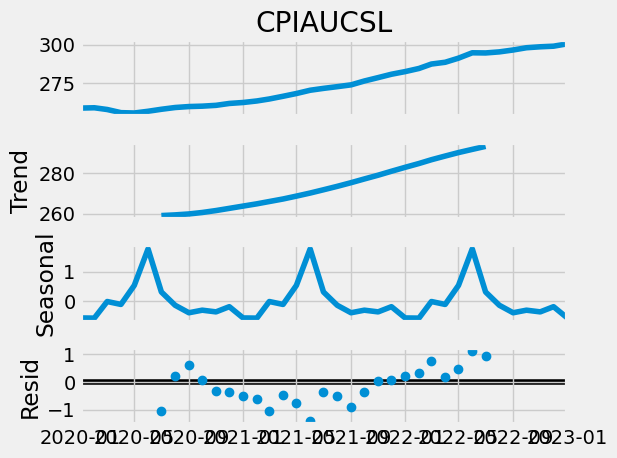

In [93]:
# Decompose the data 
decomposition = sm.tsa.seasonal_decompose(cpi_subset['CPIAUCSL'], model='additive')
decomposition.plot()
plt.show()

### Trend: The trend component shows the long-term direction of the CPIAUCSL. In this case, we observe a clear upward trend, indicating a general ### increase in the CPIAUCSL over the observed time period.
### Seasonal: The seasonal component reveals any recurring patterns within the data. Here, we can see a somewhat regular cyclical pattern.
### Noise: The residual component represents the part of the time series that is not explained by the trend and seasonality. 


### Dickey fuller

In [100]:
# Dickey fuller
from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

dickey_fuller(cpi_subset['CPIAUCSL'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.112881
p-value                         0.998803
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [104]:
# First round of differencing
cpi_diff1 = cpi_subset['CPIAUCSL'].diff().dropna()
dickey_fuller(cpi_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.129177
p-value                         0.024468
Number of Lags Used             0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


### Original Data: The test indicated that the original data is non-stationary (p-value = 0.998803).
### First Difference: The test indicated that the first differenced data is stationary (p-value = 0.024468).

# Autocorrelations

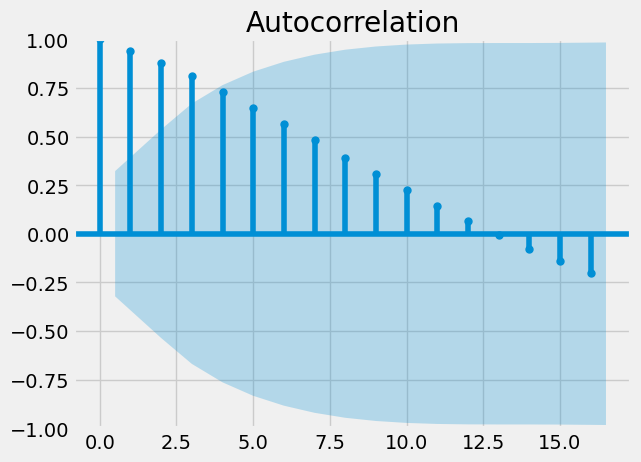

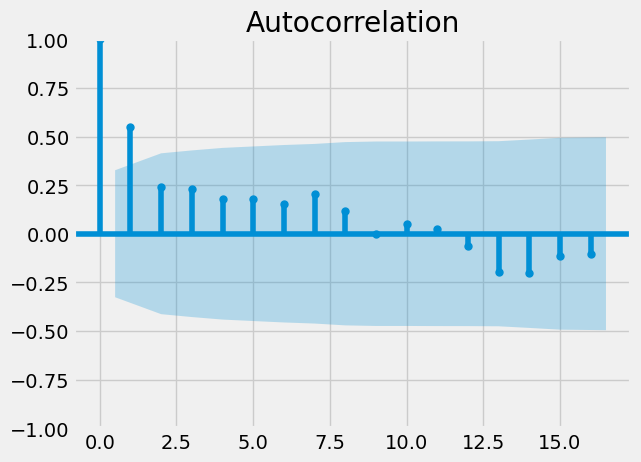

In [120]:
# Check autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(cpi_subset['CPIAUCSL'])  # Original data
plt.show()
plot_acf(cpi_diff1)  # First difference
plt.show()